# Exercise 4 - Linear Regression

### Problem 1 : Predicting SalePrice using GrLivArea

a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train
set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.

In [318]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Get dataset -- GrLivArea and SalePrice

In [319]:
house = pd.read_csv('train.csv')

Get the table head

In [320]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Get GrlivArea and SalePrice variables

In [321]:
grlivarea = pd.DataFrame(house['GrLivArea']) #grlivarea is a Predictor
saleprice = pd.DataFrame(house['SalePrice']) #sale price is a Response

Check grlivarea and saleprice

In [322]:
grlivarea.describe()

,GrLivArea
count,1460.000000
mean,1515.463699
std,525.480383
min,334.000000
25%,1129.500000
50%,1464.000000
75%,1776.750000
max,5642.000000


In [323]:
saleprice.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [324]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Taking the first 80% and the next 20% as train and test datasets respectively could lead to a biased sample thus use train_test_split to randomise the dataset used for train and test.

In [325]:
# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(grlivarea, saleprice, test_size = 0.20)

In [326]:
x_train.describe() #80% * 1460 = 1168 Predictor datasets used for train

,GrLivArea
count,1168.000000
mean,1522.727740
std,532.370341
min,334.000000
25%,1136.250000
50%,1476.500000
75%,1776.000000
max,5642.000000


In [327]:
y_train.describe() #80% * 1460 = 1168 Responder datasets used for train

,SalePrice
count,1168.000000
mean,181876.403253
std,78965.945866
min,34900.000000
25%,129975.000000
50%,165000.000000
75%,214600.000000
max,745000.000000


In [328]:
x_test.describe() #20% * 1460 = 292 Predictor datasets used for test

,GrLivArea
count,292.000000
mean,1486.407534
std,496.779887
min,630.000000
25%,1120.750000
50%,1398.000000
75%,1793.000000
max,4316.000000


In [329]:
y_test.describe() #20% * 1460 = 292 Responder datasets used for test

,SalePrice
count,292.000000
mean,177100.366438
std,81346.350170
min,58500.000000
25%,129975.000000
50%,155500.000000
75%,210000.000000
max,755000.000000


Randomised from 1460 datasets to obtain 1168:292 (80:20) datasets respectively for train and test

Next, fit the linear regression model with the train dataset x_train and y_train.

In [330]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(x_train, y_train)        # train the linear regression model

LinearRegression()

In [331]:
print("The coefficient of the linear regression model is\t:", linreg.coef_)

The coefficient of the linear regression model is	: [[104.21042441]]


Next, get the linear line for visualisation

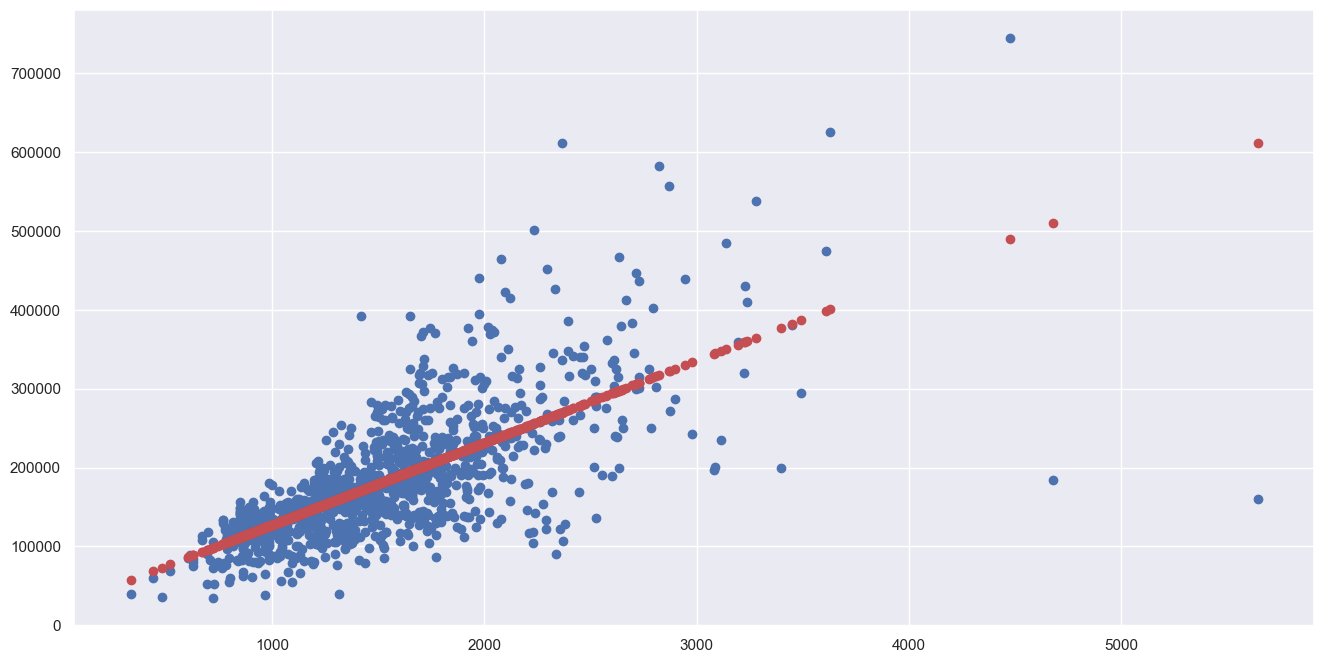

In [332]:
y_train_pred = linreg.predict(x_train)

f=plt.figure(figsize=(16,8))
plt.scatter(x_train, y_train)
plt.scatter(x_train, y_train_pred, color='r')
plt.show()

b) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set.   
Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.

To measure the Goodness of Fit of the model, the metrics used to evaluate would be:

    1)The Explained Variance (R^2) 
    
Both RME and Explained Variance are good ways to determine the Goodness of Fit, but R^2 is the best indicator to determine Goodness of Fit.

In [333]:
# Mean Squared Error (MSE)
def get_mse(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

r2 = linreg.score(x_train, y_train)
mse = get_mse(y_train, y_train_pred)

print("Goodness of Fit of the Model on        Train Set\t")
print("The Explained Variance is              \t:", r2)

Goodness of Fit of the Model on        Train Set	
The Explained Variance is              	: 0.493594542998407


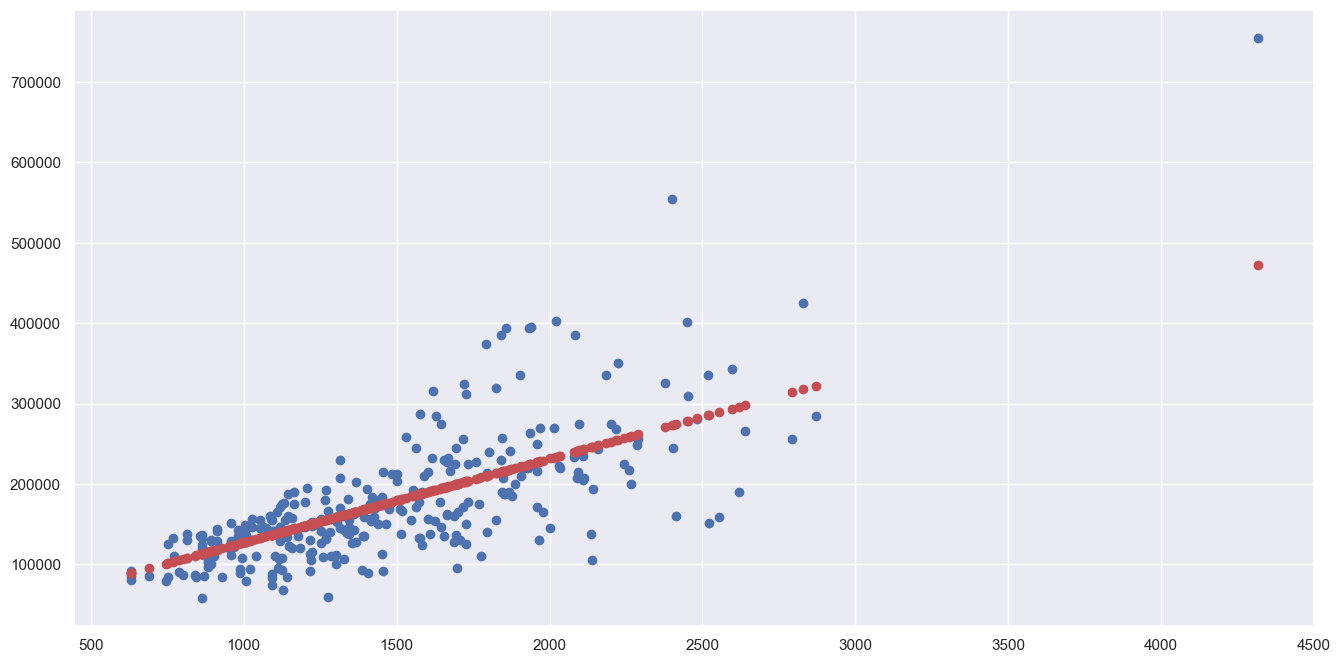

In [334]:
y_test_pred = linreg.predict(x_test)

f=plt.figure(figsize=(16,8))
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_test_pred, color='r')
plt.show()

To achieve the Prediction Accuracy of the model on the Test set.   

Metrics to be used       
1) Mean Square Error (MSE)
2) root Mean Square Error (RMSE), measures the average error performed by the model in predicting the outcome for a given predictor

Accuracy is the degree to which the value of the prediction conforms to the actual value.      
MSE = abs|(actual)-(prediction)|, hence it is a good metrics to determine prediction accuracy

In [335]:
print("Prediction Accuracy of the Model on     Test Set")
mse=get_mse(y_test, y_test_pred)
print("Mean Square Error (MSE)             \t:", mse)
print("root Mean Square Error (RMSE)       \t:", np.sqrt(mse))

Prediction Accuracy of the Model on     Test Set
Mean Square Error (MSE)             	: 3090980878.175675
root Mean Square Error (RMSE)       	: 55596.59052653926


### Problem 2 : Predicting SalePrice using Other Variables    
Following the steps from the previous problem, build two new uni-variate Linear Regression models to predict SalePrice   
using the variables TotalBsmtSF and GarageArea, individually. Justify which of the three models is the best in this case.

Get variable of TotalBsmtSF and GarageArea

In [360]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [337]:
totalbsmtsf = pd.DataFrame(house['TotalBsmtSF'])
garagearea = pd.DataFrame(house['GarageArea'])

totalbsmtsf.describe()

,TotalBsmtSF
count,1460.000000
mean,1057.429452
std,438.705324
min,0.000000
25%,795.750000
50%,991.500000
75%,1298.250000
max,6110.000000


In [338]:
garagearea.describe()

,GarageArea
count,1460.000000
mean,472.980137
std,213.804841
min,0.000000
25%,334.500000
50%,480.000000
75%,576.000000
max,1418.000000


In [339]:
bsmt_train, bsmt_test, sp1_train, sp1_test = train_test_split(totalbsmtsf, saleprice, test_size = 0.20)
garage_train, garage_test, sp2_train, sp2_test = train_test_split(garagearea, saleprice, test_size = 0.20)

Check each variable (should have 1168 train and 292 test datas 80:20 for predictors and respondors)

In [340]:
bsmt_train.describe()

,TotalBsmtSF
count,1168.000000
mean,1056.634418
std,448.355516
min,0.000000
25%,793.000000
50%,988.000000
75%,1300.500000
max,6110.000000


In [341]:
bsmt_test.describe()

,TotalBsmtSF
count,292.000000
mean,1060.609589
std,398.474063
min,0.000000
25%,815.500000
50%,1008.000000
75%,1293.750000
max,2444.000000


In [342]:
sp1_train.describe()

,SalePrice
count,1168.000000
mean,181112.754281
std,79327.191702
min,34900.000000
25%,130000.000000
50%,163000.000000
75%,214000.000000
max,745000.000000


In [343]:
sp1_test.describe()

,SalePrice
count,292.000000
mean,180154.962329
std,80034.261056
min,58500.000000
25%,127000.000000
50%,164250.000000
75%,214000.000000
max,755000.000000


In [344]:
garage_train.describe()

,GarageArea
count,1168.000000
mean,471.795377
std,211.918037
min,0.000000
25%,336.000000
50%,480.000000
75%,576.000000
max,1418.000000


In [345]:
garage_test.describe()

,GarageArea
count,292.000000
mean,477.719178
std,221.501088
min,0.000000
25%,308.000000
50%,478.000000
75%,576.000000
max,1220.000000


In [346]:
sp2_train.describe()

,SalePrice
count,1168.000000
mean,180700.502568
std,79528.761547
min,34900.000000
25%,129975.000000
50%,162000.000000
75%,213492.500000
max,755000.000000


In [347]:
sp2_test.describe()

,SalePrice
count,292.000000
mean,181803.969178
std,79226.444516
min,37900.000000
25%,129975.000000
50%,168750.000000
75%,214125.000000
max,582933.000000


Create linear regression model for bsmt and saleprice first

In [348]:
linreg.fit(bsmt_train, sp1_train)        # train the linear regression model

LinearRegression()

In [349]:
print("The coefficient of the linear regression model is\t:", linreg.coef_)

The coefficient of the linear regression model is	: [[109.20752206]]


Visualisation of the linear regression model of BSMT and SalePrice

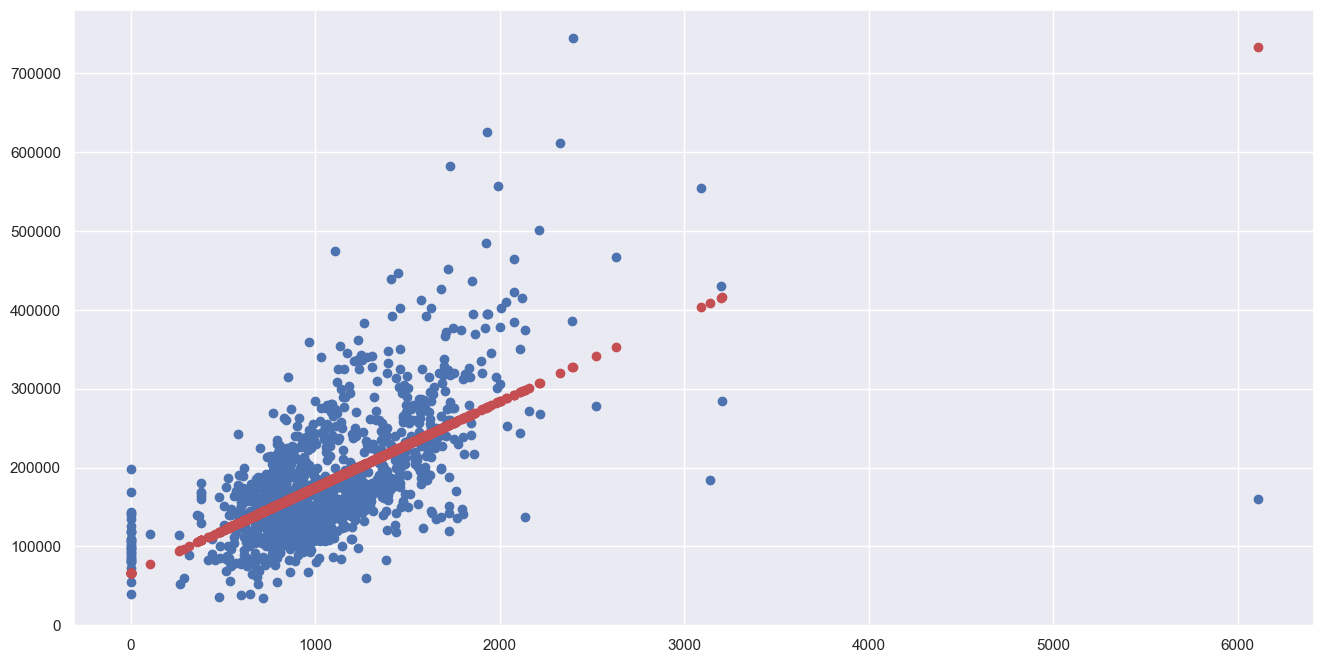

In [350]:
sp1_train_pred = linreg.predict(bsmt_train)

f=plt.figure(figsize=(16,8))
plt.scatter(bsmt_train, sp1_train)
plt.scatter(bsmt_train, sp1_train_pred, color='r')
plt.show()

In [351]:
print("Goodness of Fit of the model    on train set")
print("Explained Variance (R^2)\t:", linreg.score(bsmt_train, sp1_train) )


Goodness of Fit of the model    on train set
Explained Variance (R^2)	: 0.3809833369491368


Moving onto the Test Dataset of BSMT and SalePrice(SP1)

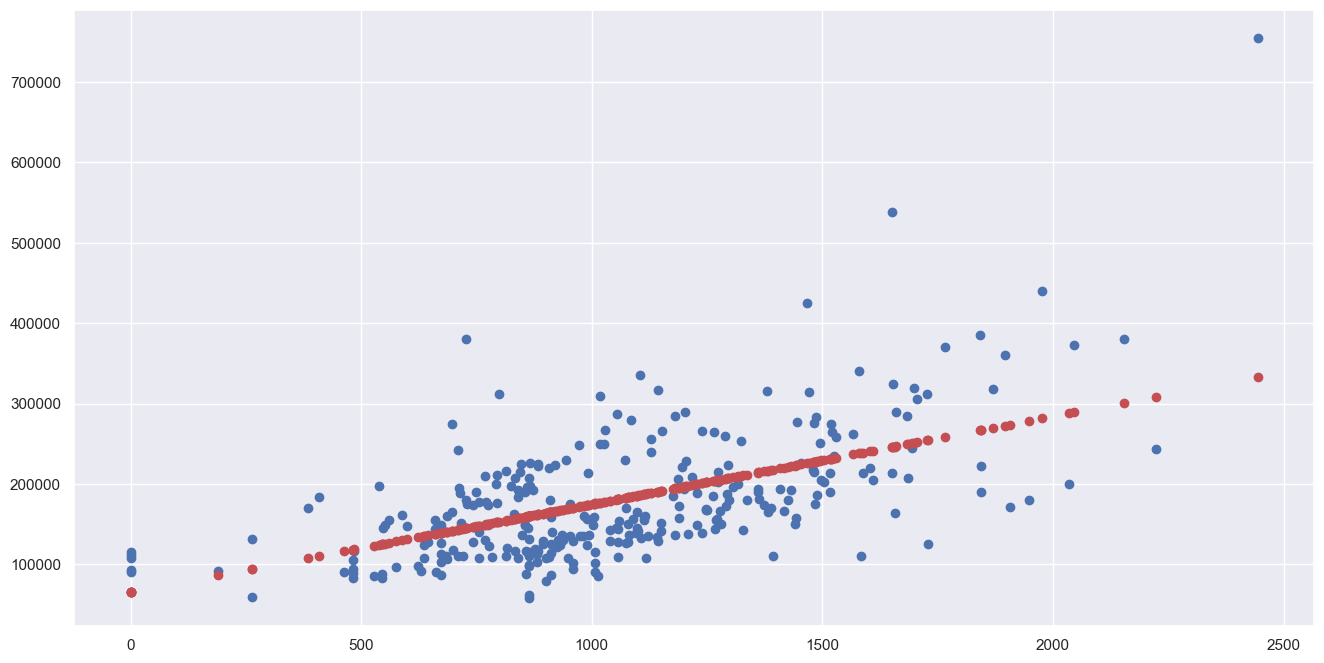

In [352]:
sp1_test_pred = linreg.predict(bsmt_test)

f=plt.figure(figsize=(16,8))
plt.scatter(bsmt_test, sp1_test)
plt.scatter(bsmt_test, sp1_test_pred, color='r')
plt.show()

In [353]:
print("Prediction Accuracy of the Model on     Test Set")
mse=get_mse(sp1_test, sp1_test_pred)
print("Mean Square Error (MSE)             \t:", mse)
print("root Mean Square Error (RMSE)       \t:", np.sqrt(mse))

Prediction Accuracy of the Model on     Test Set
Mean Square Error (MSE)             	: 4097816012.180855
root Mean Square Error (RMSE)       	: 64014.18602295006


### Moving onto the variable of GarageArea(garage) and SalePrice (sp2)

In [354]:
linreg.fit(garage_train, sp2_train)   

LinearRegression()

In [355]:
print("The coefficient of the linear regression model is\t:", linreg.coef_)

The coefficient of the linear regression model is	: [[228.04005282]]


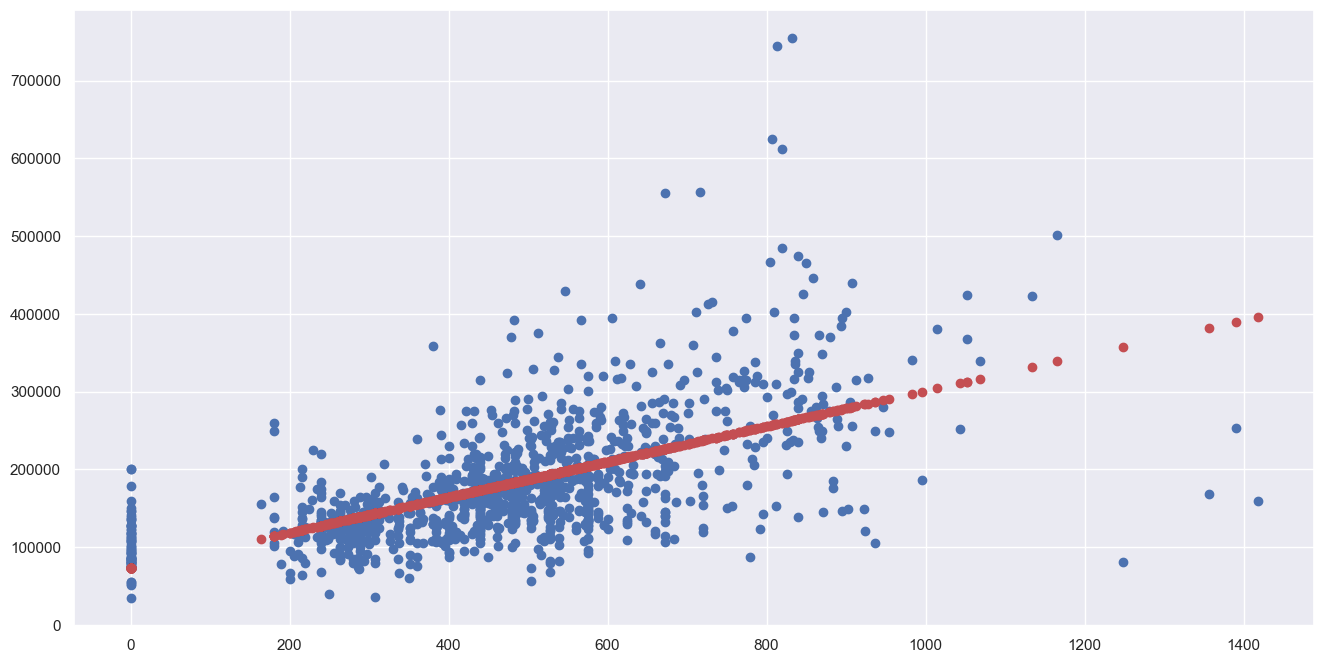

In [356]:
sp2_train_pred = linreg.predict(garage_train)

f=plt.figure(figsize=(16,8))
plt.scatter(garage_train, sp2_train)
plt.scatter(garage_train, sp2_train_pred, color='r')
plt.show()

In [357]:
print("Goodness of Fit of the model    on train set")
print("Explained Variance (R^2)\t:", linreg.score(garage_train, sp2_train) )

Goodness of Fit of the model    on train set
Explained Variance (R^2)	: 0.3692407916427952


Moving onto the Test Dataset for Garage (garage) and SalePrice (sp2)

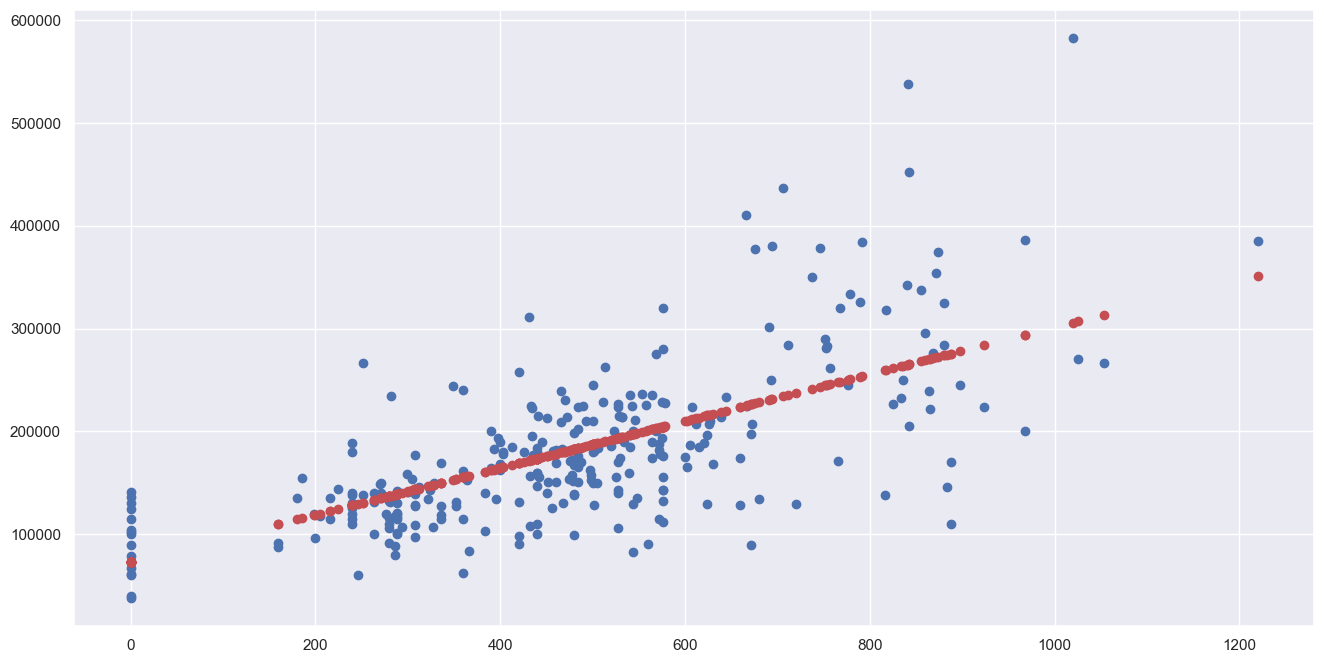

In [358]:
sp2_test_pred = linreg.predict(garage_test)

f=plt.figure(figsize=(16,8))
plt.scatter(garage_test, sp2_test)
plt.scatter(garage_test, sp2_test_pred, color='r')
plt.show()

In [359]:
print("Prediction Accuracy of the Model on     Test Set")
mse=get_mse(sp2_test, sp2_test_pred)
print("Mean Square Error (MSE)             \t:", mse)
print("root Mean Square Error (RMSE)       \t:", np.sqrt(mse))

Prediction Accuracy of the Model on     Test Set
Mean Square Error (MSE)             	: 3336627837.217729
root Mean Square Error (RMSE)       	: 57763.551113290545


### Conclusion,
**for GrLivArea,**         

    Goodness of Fit of the Model            on Train Set	      
    Explained Variance              : 0.493594542998407
    
    Prediction Accuracy of the Model on     Test Set
    Mean Square Error (MSE)             	: 3090980878.175675
    root Mean Square Error (RMSE)       	: 55596.59052653926

**for TotalBsmtSF**          

    Goodness of Fit of the Model            on Train set  
    Explained Variance (R^2)	: 0.3809833369491368
    
    Prediction Accuracy of the Model on     Test Set
    Mean Square Error (MSE)             	: 4097816012.180855
    root Mean Square Error (RMSE)       	: 64014.18602295006

**for GarageArea**      

    Goodness of Fit of the Model            on Train set        
    Explained Variance (R^2)	: 0.3692407916427952
    
    Prediction Accuracy of the Model on     Test Set
    Mean Square Error (MSE)             	: 3336627837.217729
    root Mean Square Error (RMSE)       	: 57763.551113290545

b) "GrLivArea" variable is the best in this case to predict sale price. With a higher explained variance on its 
model, it means that the Goodness of Fit of the model is better in order to predict a more accurate result of the SalePrice.
Furthemore, the RMSE and MSE of the prediction result of "GrLivArea" on the test set is lower as compared to the variable of "TotalBsmtSF" and "GarageArea", thus this means that the model provides a prediction result that offer less error margin, and hence the best model to predict Sale Price.

# Problem 3 : Refining the Models to Predict SalePrice

(a) Find the houses (rows) that are “outliers” for GrLivArea and/or SalePrice. This means outliers for GrLivArea
UNION outliers for SalePrice in a set notation. Remove all these “outliers” from the dataset so that it is clean.

In [372]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [400]:
grlivarea_ = house['GrLivArea']
saleprice_ = house['SalePrice']

In [376]:
data = {'Sale Price' : saleprice_, 'GrLivArea' : grlivarea_}
for name, dataset in data.items():
    outliers = find_outliers_IQR(dataset)
    print(f"{name} has {len(outliers)} outliers.")
    
print("Both Sale Price and GrLivArea has a total of 92 outliers.")

Sale Price has 61 outliers.
GrLivArea has 31 outliers.
Both Sale Price and GrLivArea has a total of 92 outliers.


In [401]:
#Function to find number of outliers
def whiskers(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr = q3 - q1
    upperQ = q3 + 1.5 * iqr
    lowerQ = q1 - 1.5 * iqr
    return (lowerQ,upperQ)

salePriceBounds = whiskers(df["SalePrice"])
grLivAreaBounds = whiskers(df["GrLivArea"])

Filtered = df[(df['SalePrice'] >= salePriceBounds[0]) & (df['SalePrice'] <= salePriceBounds[1]) 
                & (df['GrLivArea'] >= grLivAreaBounds[0]) & (df['GrLivArea'] <= grLivAreaBounds[1])]

In [428]:
filboth = pd.DataFrame(Filtered[['SalePrice', 'GrLivArea']])
filsaleprice = pd.DataFrame(Filtered['SalePrice'])
filgrlivarea = pd.DataFrame(Filtered['GrLivArea'])

In [429]:
## Filtered Data
filboth.describe()

,SalePrice,GrLivArea
count,1383.000000,1383.000000
mean,169306.211858,1453.518438
std,58693.656943,434.424442
min,34900.000000,334.000000
25%,128500.000000,1116.500000
50%,158500.000000,1431.000000
75%,202150.000000,1719.500000
max,340000.000000,2730.000000


In [430]:
filsaleprice.describe()

,SalePrice
count,1383.000000
mean,169306.211858
std,58693.656943
min,34900.000000
25%,128500.000000
50%,158500.000000
75%,202150.000000
max,340000.000000


In [431]:
filgrlivarea.describe()

,GrLivArea
count,1383.000000
mean,1453.518438
std,434.424442
min,334.000000
25%,1116.500000
50%,1431.000000
75%,1719.500000
max,2730.000000


(b) In the outlier-free dataset, create Train and Test sets with an 80:20 ratio, and fit a Linear Regression model on
the Train set to predict SalePrice using GrLivArea. Print the model coefficients and plot the regression line.

In [432]:
filx_train, filx_test, fily_train, fily_test = train_test_split(filgrlivarea, filsaleprice, test_size = 0.20)

In [433]:
filx_train.describe() #training set for predictor

,GrLivArea
count,1106.000000
mean,1456.068716
std,435.186240
min,334.000000
25%,1111.000000
50%,1430.000000
75%,1727.250000
max,2730.000000


In [434]:
fily_test.describe() #testing set for respondor

,SalePrice
count,277.000000
mean,167086.754513
std,61192.838958
min,35311.000000
25%,127000.000000
50%,155000.000000
75%,199900.000000
max,339750.000000


In [435]:
linreg.fit(filx_train, fily_train) 

LinearRegression()

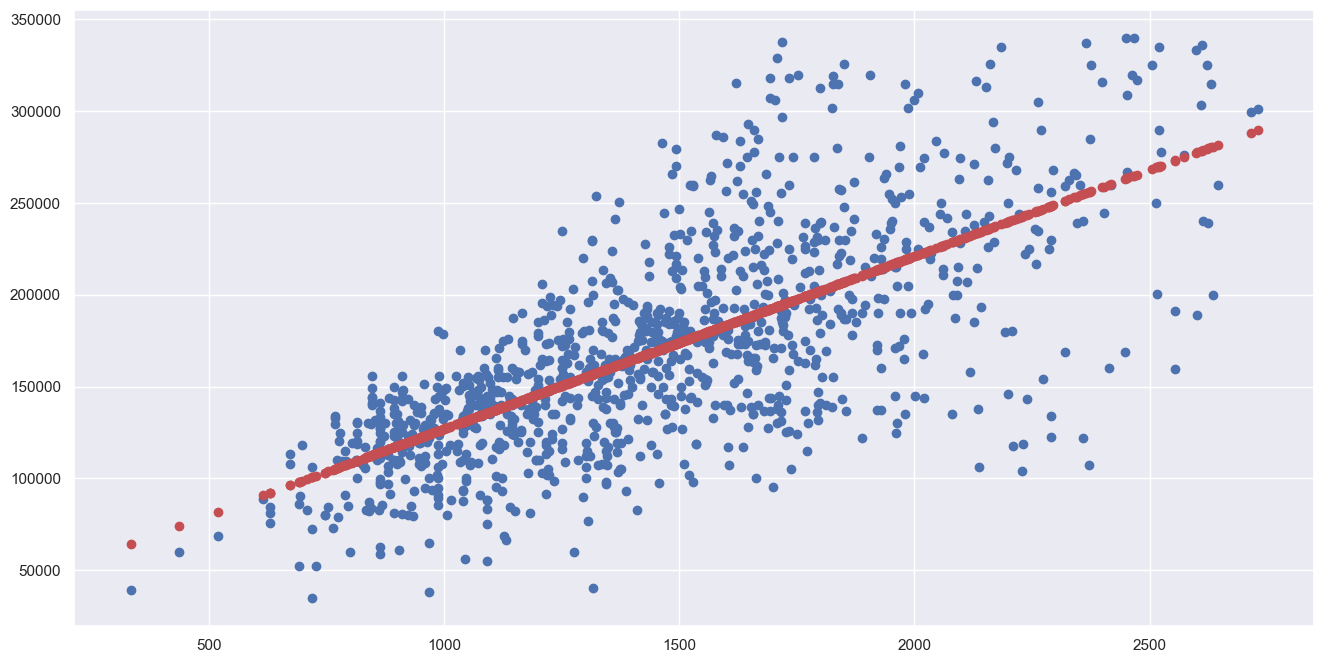

In [437]:
#Linear Regression Model
fily_train_pred = linreg.predict(filx_train)

f=plt.figure(figsize=(16,8))
plt.scatter(filx_train, fily_train)
plt.scatter(filx_train, fily_train_pred, color='r')
plt.show()

In [439]:
print("The coefficient of the linear regression model is \t:", linreg.coef_)

The coefficient of the linear regression model is 	: [[94.05804599]]


c) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set.    
Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify.

In [455]:
print("Goodness of Fit of the model            on Train set")
print("Explained Variance (R^2)        \t:", linreg.score(filx_train, fily_train) )     

Goodness of Fit of the model            on Train set
Explained Variance (R^2)        	: 0.49693043235622714


In [454]:
fily_test_pred = linreg.predict(filx_test)
print("Prediction Accuracy of the Model        on Test Set")
mse=get_mse(fily_test, fily_test_pred)
print("Mean Square Error (MSE)             \t:", mse)
print("root Mean Square Error (RMSE)       \t:", np.sqrt(mse))

Prediction Accuracy of the Model        on Test Set
Mean Square Error (MSE)             	: 2218852907.039611
root Mean Square Error (RMSE)       	: 47104.70153858966


### data from the first model in problem 1
Goodness of Fit of the Model on        Train Set	   
    The Explained Variance is           : 0.493594542998407

Prediction Accuracy of the Model on     Test Set       
Mean Square Error (MSE)             	: 3090980878.175675      
root Mean Square Error (RMSE)       	: 55596.59052653926
### ----------------------------------------------------------------

The second model without the outliers is a better model for predictions compared to the one in problem 1.      
Reason being, it has a higher explained variance of 0.496 as compared to 0.493 of the one in problem 1, this means that there is slightly more error explained in the second model.      
Additionally, the mean square error (MSE) of the second model is lower than the MSE of the first model (2218852907 < 3090980878), thus this mean that the produced regression model has a less differential value in terms of the predicted and actual value when tested on the test data, proving that it produces a predicted value with lesser margin error.        
Thus, the second model is better than the model in problem 1 as it can give a more accurate and reliable prediction as compared to the first model.